<a href="https://colab.research.google.com/github/aimee-annabelle/Peer_Group_10_Water_Quality_Model/blob/main/Peer_Group_10_formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:

#LOAD THE DATA
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("water_potability.csv")

# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.

In [3]:

# Check for missing values in each column
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
# percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [5]:
# too many null values, rather than removing them, I will add their medians instead of the null values ​​for this data set
df.fillna(df.median(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [6]:
# Display summary statistics for numerical columns
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Plot the Data Appropriately

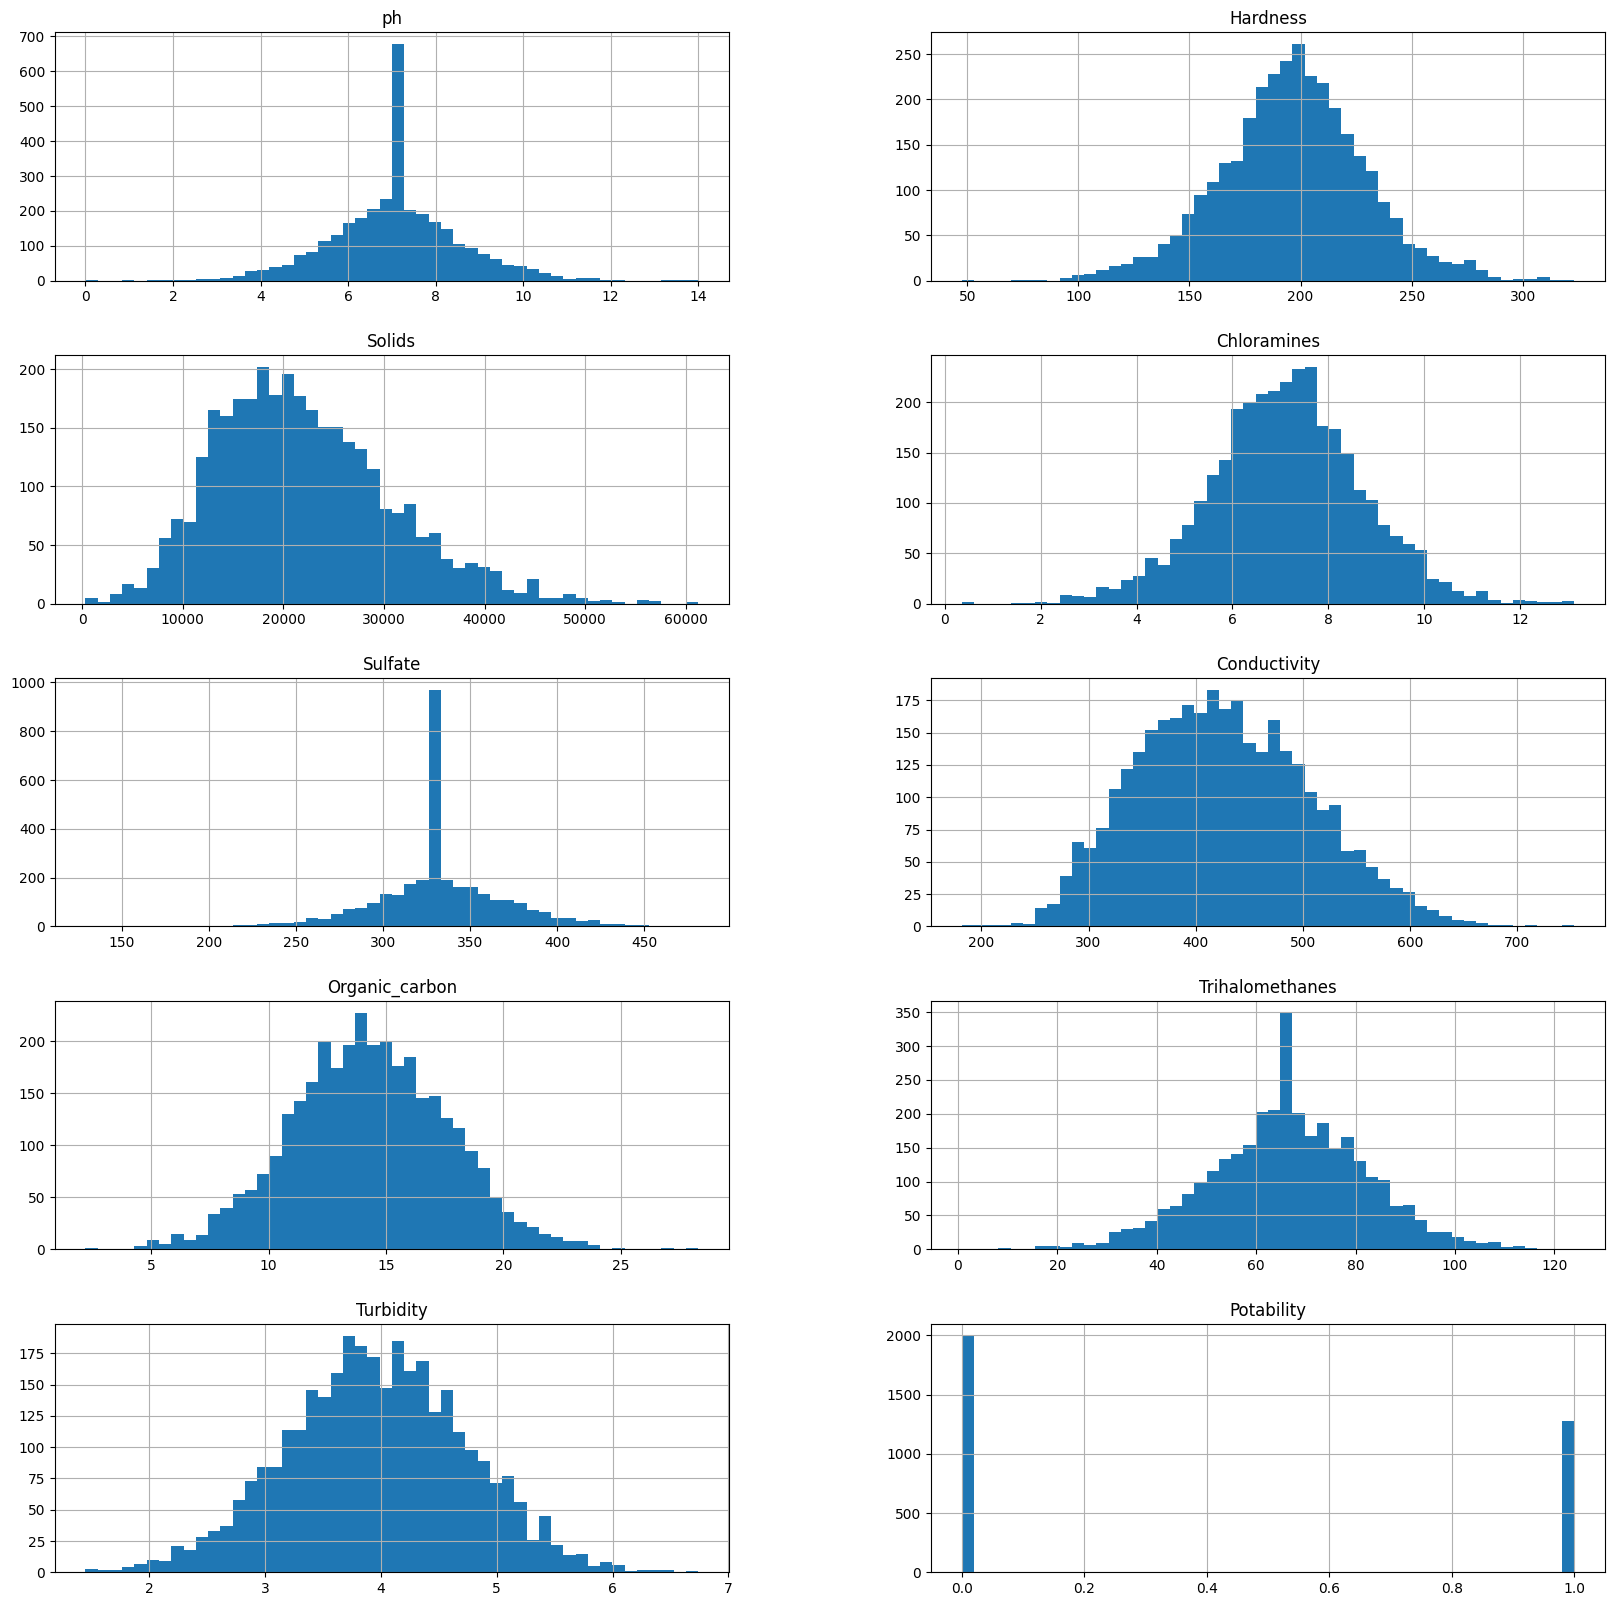

In [7]:
df.hist(figsize = (20,20), bins=50, layout=(5,2));

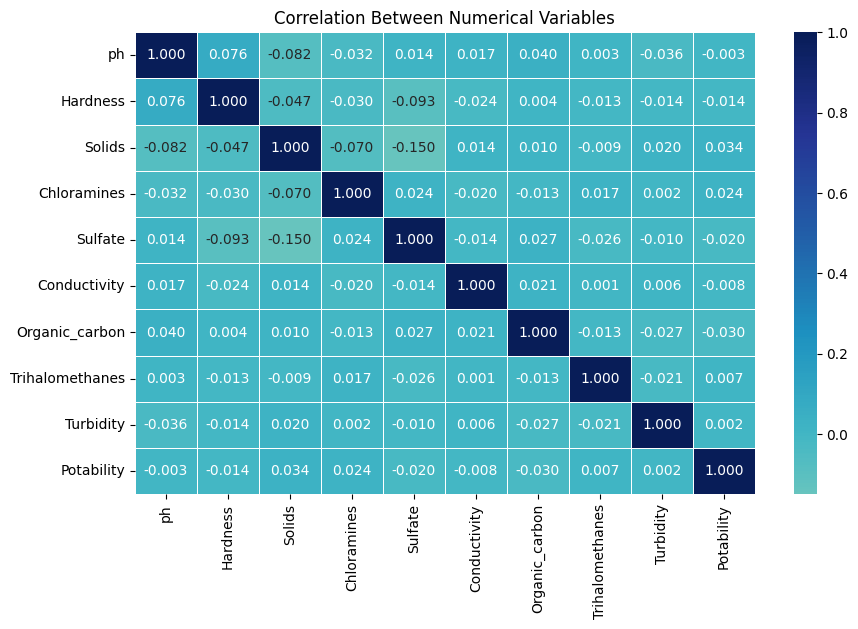

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', center=0, linewidths=0.5, fmt='.3f')
plt.title('Correlation Between Numerical Variables')
plt.show()

In [9]:

from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable

x = df.drop('Potability', axis=1).values
y = df['Potability'].values

In [10]:
# Split data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:
# Feature scaling - CRITICAL for neural network performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Validation data shape: {X_val_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

Features scaled successfully!
Training data shape: (2293, 9)
Validation data shape: (491, 9)
Test data shape: (492, 9)


# Each Memeber Defines their model Here

In [12]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [13]:

def model_Annabelle_Ineza():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)), 
        BatchNormalization(),
        Dropout(0.3),  # Reduced dropout slightly
         
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.4),  # Adjusted dropout
         
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.2),
         
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
     
    # Slightly higher learning rate for better convergence
    adam_optimizer = Adam(learning_rate=0.001)  # Increased from 0.0005
    
    # Added precision and recall metrics for better monitoring
    model.compile(optimizer=adam_optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', 'precision', 'recall'])
     
    return model

# Instantiate the improved model
model = model_Annabelle_Ineza()

In [14]:
# Calculate class weights to handle imbalanced data
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print(f"Class distribution in training data: {np.bincount(y_train)}")
print(f"Calculated class weights: {class_weight_dict}")

Class distribution in training data: [1381  912]
Calculated class weights: {np.int64(0): np.float64(0.8301955104996379), np.int64(1): np.float64(1.2571271929824561)}


# Start the training Process

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Define callbacks for early stopping and learning rate scheduling
early_stopping = EarlyStopping(
    monitor="val_loss", 
    patience=20,  # Increased patience
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss", 
    factor=0.7,  # Less aggressive reduction
    patience=8,   # Reduced patience for LR scheduling
    min_lr=1e-7,
    verbose=1
)

# Train the model with scaled data and class weights
history_adam = model.fit(
    X_train_scaled, y_train,  # Use scaled training data
    validation_data=(X_val_scaled, y_val),  # Use scaled validation data
    epochs=200, 
    batch_size=32,  # Reduced batch size for better training
    class_weight=class_weight_dict,  # CRITICAL: Added class weights to handle imbalance
    callbacks=[early_stopping, lr_scheduler], 
    verbose=1
)


Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 110ms/step - accuracy: 0.5189 - loss: 2.2589 - precision: 0.4209 - recall: 0.5277 - val_accuracy: 0.3686 - val_loss: 2.0271 - val_precision: 0.3659 - val_recall: 0.9724 - learning_rate: 0.0010
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5436 - loss: 2.0184 - precision: 0.4561 - recall: 0.5726 - val_accuracy: 0.4399 - val_loss: 1.8541 - val_precision: 0.3907 - val_recall: 0.9282 - learning_rate: 0.0010
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5491 - loss: 1.8438 - precision: 0.4523 - recall: 0.5425 - val_accuracy: 0.4847 - val_loss: 1.7052 - val_precision: 0.4095 - val_recall: 0.9006 - learning_rate: 0.0010
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5796 - loss: 1.6661 - precision: 0.4808 - recall: 0.5865 - val_accuracy: 0.5295 - val_loss: 1.5742 - val_precision: 0.4256 - val_recall: 0.7901 - learning_rate: 0.0010
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy

In [22]:
# Threshold optimization for better performance on imbalanced data
import numpy as np
from sklearn.metrics import f1_score

# Get prediction probabilities using scaled test data
y_pred_proba = model.predict(X_test_scaled)

# Test different thresholds to find the optimal one
thresholds = np.arange(0.3, 0.7, 0.05)
best_f1 = 0
best_threshold = 0.5

print("Testing different thresholds:")
for threshold in thresholds:
    y_pred_thresh = (y_pred_proba > threshold).astype("int32")
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {threshold:.2f}, F1-score: {f1:.3f}")
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nOptimal threshold: {best_threshold:.2f}")
print(f"Best F1-score: {best_f1:.3f}")

# Use the optimal threshold for final predictions
y_pred_adam_optimized = (y_pred_proba > best_threshold).astype("int32")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Testing different thresholds:
Threshold: 0.30, F1-score: 0.572
Threshold: 0.35, F1-score: 0.588
Threshold: 0.40, F1-score: 0.577
Threshold: 0.45, F1-score: 0.558
Threshold: 0.50, F1-score: 0.552
Threshold: 0.55, F1-score: 0.516
Threshold: 0.60, F1-score: 0.455
Threshold: 0.65, F1-score: 0.395

Optimal threshold: 0.35
Best F1-score: 0.588


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# classification report with optimized threshold
print("=== IMPROVED MODEL PERFORMANCE ===")
print(f"Using optimized threshold: {best_threshold:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_adam_optimized))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_adam_optimized))

# Compare with original threshold (0.5) for reference
print("\n=== COMPARISON WITH ORIGINAL THRESHOLD (0.5) ===")
y_pred_original = (y_pred_proba > 0.5).astype("int32")
print("Original Classification Report (threshold=0.5):")
print(classification_report(y_test, y_pred_original))

# improvement summary
from sklearn.metrics import precision_recall_fscore_support
precision_new, recall_new, f1_new, _ = precision_recall_fscore_support(y_test, y_pred_adam_optimized, average=None)
precision_old, recall_old, f1_old, _ = precision_recall_fscore_support(y_test, y_pred_original, average=None)

print("\n=== IMPROVEMENT SUMMARY ===")
print(f"Class 1 (Potable Water) Improvements:")
print(f"Recall: {recall_old[1]:.3f} → {recall_new[1]:.3f} (Change: {recall_new[1]-recall_old[1]:+.3f})")
print(f"F1-score: {f1_old[1]:.3f} → {f1_new[1]:.3f} (Change: {f1_new[1]-f1_old[1]:+.3f})")
print(f"Precision: {precision_old[1]:.3f} → {precision_new[1]:.3f} (Change: {precision_new[1]-precision_old[1]:+.3f})")

=== IMPROVED MODEL PERFORMANCE ===
Using optimized threshold: 0.35

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.41      0.54       307
           1       0.46      0.83      0.59       185

    accuracy                           0.57       492
   macro avg       0.63      0.62      0.56       492
weighted avg       0.67      0.57      0.56       492


Confusion Matrix:
[[125 182]
 [ 32 153]]

=== COMPARISON WITH ORIGINAL THRESHOLD (0.5) ===
Original Classification Report (threshold=0.5):
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       307
           1       0.56      0.55      0.55       185

    accuracy                           0.67       492
   macro avg       0.64      0.64      0.64       492
weighted avg       0.67      0.67      0.67       492


=== IMPROVEMENT SUMMARY ===
Class 1 (Potable Water) Improvements:
Recall: 0.546 → 0.827 (Change: +0.281)
F1-score:

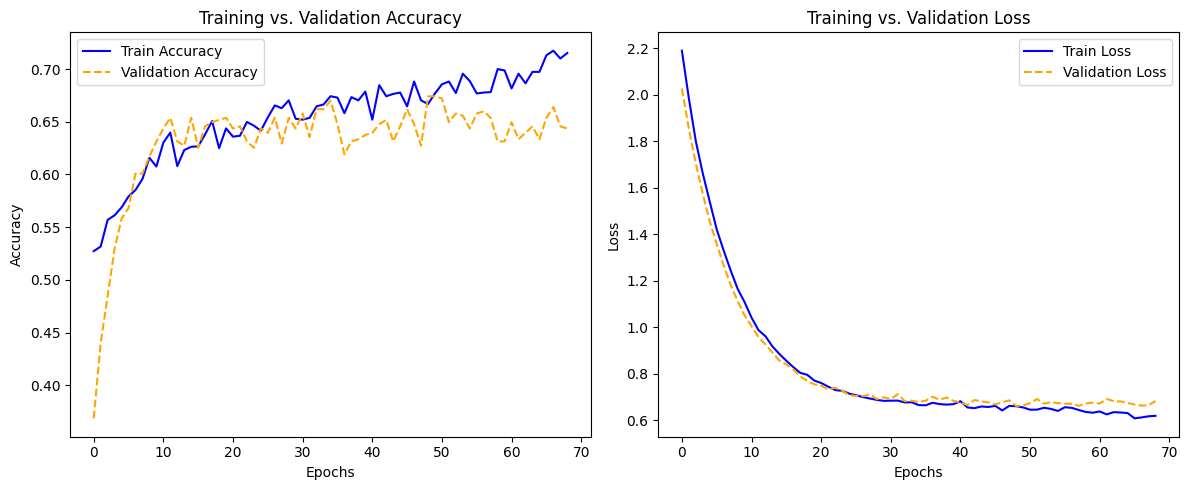

In [23]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs. Validation Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_training_history(history_adam)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,741 (143.52 KB)

 Trainable params: 12,097 (47.25 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 24,196 (94.52 KB)